In [1]:
from matplotlib import pyplot as plt
from numpy.random import randn
import random
%matplotlib inline
import numpy as np
from skimage import color

import sys
sys.path.append("..")
from src import hierarchic_blending_operator
from src import color_converter
from src import color_operations
from src import color_schemes
from src import picture_worker
from src import helper

Number of points

In [2]:
size = 400

Number of Gaussians to use

In [3]:
number_of_gaussians = 5

Interval to use

In [4]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
variance_min, variance_max = 2, 30

Color-Maps to use

Matplotlib

In [5]:
color_maps = [color_schemes.random_matplotlib_colorschemes() for i in range(number_of_gaussians)][:number_of_gaussians]

In [6]:
color_maps

['gist_gray_r', 'Wistia_r', 'GnBu_r', 'PiYG_r', 'ocean_r']

Monochrom

In [7]:
monochromatic_color_maps = [[1,0,0,1], [0,1,0,1], [0,0,1,1], [1,1,0,1], [0,1,1,1]]

In [8]:
def generate_gaussian(colorscheme, verbose=False):
    X, Y, Z = helper.get_random_gaussian(x_min,x_max,y_min,y_max,variance_min, variance_max,size,0.6)
    img, Z_alpha = picture_worker.get_colorgrid(Z,color_schemes.matplotlib_colorschemes,10,colorscheme=colorscheme, verbose=verbose)
    return img, Z

In [9]:
def generate_monochromatic_gaussian(Z, startcolor, verbose=False):
    img, Z_alpha = picture_worker.get_colorgrid(Z,color_schemes.create_monochromatic_colorscheme,10,False,startcolor=startcolor, verbose=verbose)
    return img

In [10]:
img_list_matplotlib = []
z_list = []
for i in color_maps:
    img, z = generate_gaussian(i,verbose=  False)
    img_list_matplotlib.append(img)
    z_list.append(z)

In [11]:
img_list_monochromatic = []
for z,i in zip(z_list, monochromatic_color_maps):
    img = generate_monochromatic_gaussian(z, i, verbose=  False)
    img_list_monochromatic.append(img)

In [12]:
z_sum = z_list[0].copy()
for i in z_list[1:]:
    z_sum += i

## RGB-Colorspace

### Matplotlib Colorschemes

In [13]:
mixed, alpha_new = picture_worker.combine_multiple_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, img_list_matplotlib, z_list)

In [14]:
mixed_new = picture_worker.find_contour_lines(z_sum, mixed, 7)

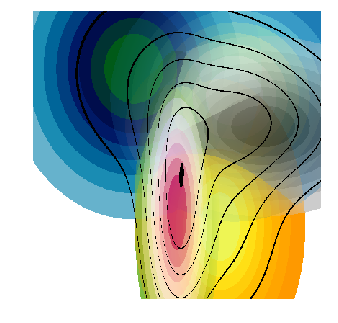

In [15]:
#displays an image
plt.imshow(mixed)
plt.subplots_adjust(0, 0, 1, 1)
plt.axis("off")
plt.show()

### Monochromatic Colorschemes

In [16]:
mixed, alpha_new = picture_worker.combine_multiple_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, img_list_monochromatic, z_list)

In [17]:
mixed_new = picture_worker.find_contour_lines(z_sum, mixed, 7)

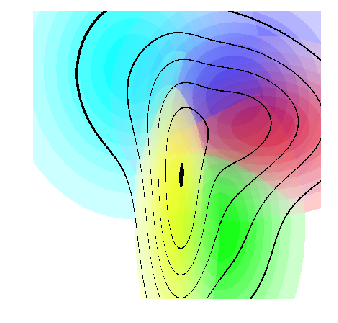

In [18]:
#displays an image
plt.imshow(mixed)
plt.subplots_adjust(0, 0, 1, 1)
plt.axis("off")
plt.show()

## Lab-Colorspace

### Matplotlib Colorscheme

In [19]:
mixed, alpha_new = picture_worker.combine_multiple_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, img_list_matplotlib, z_list, color_space="lab")

In [20]:
mixed_new = picture_worker.find_contour_lines(z_sum, mixed, 7)

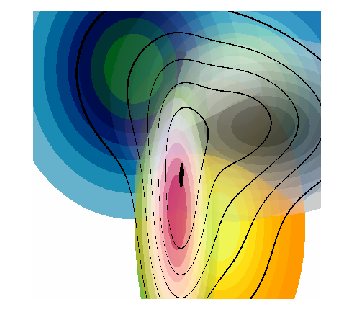

In [21]:
#displays an image
plt.imshow(mixed)
plt.subplots_adjust(0, 0, 1, 1)
plt.axis("off")
plt.show()

### Monochromatic Color-Scheme

In [22]:
mixed, alpha_new = picture_worker.combine_multiple_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, img_list_monochromatic, z_list, color_space="lab")

In [23]:
mixed_new = picture_worker.find_contour_lines(z_sum, mixed, 7)

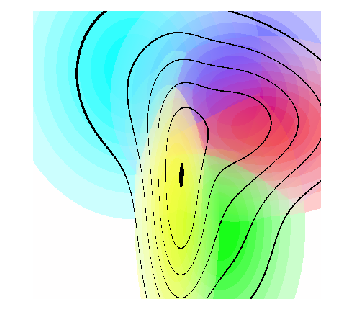

In [24]:
#displays an image
plt.imshow(mixed)
plt.subplots_adjust(0, 0, 1, 1)
plt.axis("off")
plt.show()